In [28]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
#Menggunakan library arules
install.packages("arules")
install.packages("arulesViz")
library(arules)

#Membaca transaksi dari file data_transaksi.txt
transaksi <- read.transactions(file="https://storage.googleapis.com/dqlab-dataset/data_transaksi.txt", format="single", sep="\t", cols=c(1,2), skip=1)

#Menampilkan data transaksi dengan print dan inspect 
inspect(transaksi)

#Menghasilkan model Market Basket Analysis
mba <- apriori(transaksi,parameter = list(supp = 0.1, confidence = 0.5))

#Menampilkan paket produk
inspect(subset(mba, lift>1))


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/arules_1.6-8.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1833508 bytes (1.7 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[writ

     items                      transactionID
[1]  {Pet Food,Sirup,Teh Celup} #01          
[2]  {Gula,Teh Celup}           #02          
[3]  {Pet Food,Sirup}           #03          
[4]  {Sirup,Teh Celup}          #04          
[5]  {Gula,Sirup,Teh Celup}     #05          
[6]  {Pet Food,Teh Celup}       #06          
[7]  {Pet Food,Sirup,Teh Celup} #07          
[8]  {Teh Celup}                #08          
[9]  {Gula,Teh Celup}           #09          
[10] {Gula,Pet Food,Sirup}      #10          
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4 item(s), 10 transaction(s)] done [0.00s].
sorting and 

# DQLab

In [3]:
%%R
#Menampilkan jumlah kombinasi dari produk yang terdapat pada daftar transaksi yang ada
inspect(apriori(transaksi, parameter = list(support=.1, minlen=2, target='frequent itemsets')))


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5     0.1      2
 maxlen            target  ext
     10 frequent itemsets TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
sorting transactions ... done [0.00s].
writing ... [9 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    items                      support transIdenticalToItemsets count
[1] {Gula,Pet Food}            0.1     0.0                      1    
[2] {Gula,Sirup}               0.2     0.0                      2    
[3] {Gula,Teh Celup}      

Terlihat ada sembilan kombinasi produk dengan nilai support adalah rasio dari kombinasi tersebut terhadap keseluruhan transaksi.

Sebagai contoh, kombinasi {Pet Food, Sirup} memiliki support 0.4 yang artinya kombinasi ini terdapat di 4 dari 10 transaksi yang tercatat.

In [4]:
%%R
transaksi <- read.transactions(file="https://storage.googleapis.com/dqlab-dataset/data_transaksi.txt", format="single", sep="\t", cols=c(1,2), skip=1)
itemFrequency(transaksi, type="absolute")

     Gula  Pet Food     Sirup Teh Celup 
        4         5         6         8 


Ini artinya Gula memiliki kemunculan 4 kali dari seluruh transaksi yang ada, Pet Food muncul sebanyak 5 kali, Sirup sebanyak 6 kali, dan Teh Celup sebanyak 8 kali.

Fungsi itemFrequency ini sangat penting untuk membantu kita menganalisa transaksi yang lebih kompleks dimana item yang terlibat lebih banyak dan transaksi yang terjadi lebih besar dari contoh kita saat ini

In [5]:
%%R
#Statistik Top 3
transaksi <- read.transactions(file="https://storage.googleapis.com/dqlab-dataset/data_transaksi.txt", format="single", sep="\t", cols=c(1,2), skip=1)

data_item <- itemFrequency(transaksi, type="absolute")

#Melakukan sorting pada data_item
data_item <- sort(data_item, decreasing = TRUE)

#Mengambil 3 item pertama
data_item <- data_item[1:3]

#Konversi data_item menjadi data frame dengan kolom Nama_Produk dan Jumlah
data_item <- data.frame("Nama Produk"=names(data_item), "Jumlah"=data_item, row.names=NULL)

print(data_item)

  Nama.Produk Jumlah
1   Teh Celup      8
2       Sirup      6
3    Pet Food      5


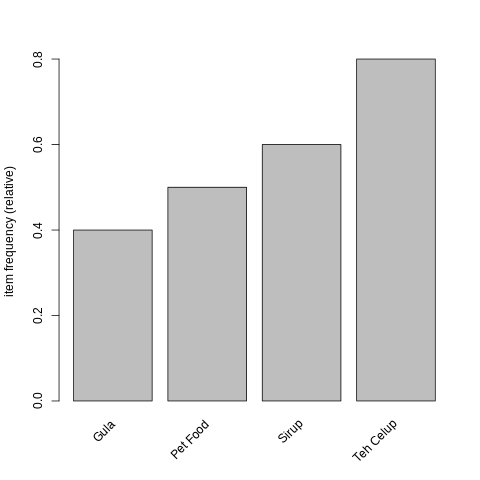

In [6]:
%%R
#Tampilan item frequency plot
itemFrequencyPlot(transaksi)

In [7]:
%%R
#Menghasilkan associaton rules
apriori(transaksi)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [3 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
set of 3 rules 


perhatikan baris terakhir dimana tertulis "set of 3 rules". Ini artinya dengan fungsi apriori ini, kita mendapatkan tiga rules

In [8]:
%%R
#Menghasilkan association rules dan disimpan sebagai variable mba
mba <- apriori(transaksi)

#Melihat isi dari rules dengan menggunakan fungsi inspect
inspect(mba)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [3 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs                rhs         support confidence coverage lift     count
[1] {}              => {Teh Celup} 0.8     0.8        1.0      1.000000 8    
[2] {Pet Food}      => {Sirup}     0.4     0.8        0.5      1.333333 4    
[3] {Gula,Pet Food} => {Sirup}     0.1     1.0        0.1     

Terlihat kalau variable mba menyimpan tiga rules dengan kolom-kolom berikut:

    lhs: itemset di bagian kiri (left hand side)
    rhs: itemset di bagian kanan (right hand side)
    support, confidence dan lift: metrik-metrik yang digunakan untuk menilai kualitas dari rule. Umumnya semakin besar semakin baik. Detil dari metrik-metrik ini akan dibahas pada bab berikutnya.

Kalau fokus kita kembali ke itemset lhs dan rhs untuk product packaging, terlihat rule kedua yaitu {Pet Food} => {Sirup} cukup menarik.

Kenapa bisa dikatakan menarik?

Karena support 0.4 menunjukkan bahwa kombinasi ini terdapat di 40 persen poulasi - berarti 4 dari 10 transaksi untuk dataset kita. Nilai lift juga di atas 1, yang artinya rule ini memiliki asosiasi tinggi antar itemset yang terdapat di rule ini.

Sedangkan {} => {Teh Celup} tidak menarik karena hanya berisi satu item. Rule sisanya, {Gula, Peta Food} = > {Sirup} terlalu unik - ini ditunjukkan dengan support 0.1 (10%) yang artinya hanya terdapat di 1 dari 10 transaksi.

Apa makna dari rule jika ingin kita aplikasikan?

Artinya ada beberapa opsi action item yang bisa kita lakukan:

    rekomendasikan kepada setiap pelanggan yang membeli Pet Food untuk membeli Sirup.
    rak display Pet Food dan Sirup bisa didekatkan.
    Pet Food dan Sirup dipaketkan bersama dan dijual dengan harga khusus.


In [9]:
%%R
#Menghasilkan association rules dan disimpan sebagai variable mba
mba <- apriori(transaksi)

#Filter rhs dengan item "Sirup" dan tampilkan
inspect(subset(mba, rhs %in% "Sirup"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.01s].
writing ... [3 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs                rhs     support confidence coverage lift     count
[1] {Pet Food}      => {Sirup} 0.4     0.8        0.5      1.333333 4    
[2] {Gula,Pet Food} => {Sirup} 0.1     1.0        0.1      1.666667 1    


In [11]:
%%R
#filter lhs
mba <- apriori(transaksi)
inspect(subset(mba, lhs %in% "Gula"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [3 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs                rhs     support confidence coverage lift     count
[1] {Gula,Pet Food} => {Sirup} 0.1     1          0.1      1.666667 1    


In [12]:
%%R
#Filter LHS dan RHS
mba <- apriori(transaksi)
inspect(subset(mba, lhs %in% "Pet Food" & rhs %in% "Sirup"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [3 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs                rhs     support confidence coverage lift     count
[1] {Pet Food}      => {Sirup} 0.4     0.8        0.5      1.333333 4    
[2] {Gula,Pet Food} => {Sirup} 0.1     1.0        0.1      1.666667 1    


In [17]:
%%R
#Menghasilkan Rules dengan Parameter Support dan Confidence
apriori(transaksi,parameter = list(supp = 0.1, confidence = 0.5))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.01s].
writing ... [16 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
set of 16 rules 


Perhatikan pada akhir baris output, terdapat 16 rule. Lebih banyak dibandingkan eksekusi perintah apriori sebelumnya yang hanya menghasilkan 3 rule.

In [20]:
%%R
transaksi <- read.transactions(file="https://storage.googleapis.com/dqlab-dataset/data_transaksi.txt", format="single", sep="\t", cols=c(1,2), skip=1)
mba <- apriori(transaksi,parameter = list(supp = 0.1, confidence = 0.5))
inspect(subset(mba, lhs %in% "Teh Celup" | rhs %in% "Teh Celup"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [16 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs                     rhs         support confidence coverage lift     
[1] {}                   => {Teh Celup} 0.8     0.8000000  1.0      1.0000000
[2] {Gula}               => {Teh Celup} 0.3     0.7500000  0.4      0.9375000
[3] {Pet Food}           => {Teh Celup} 0.3     0.6000000  0.

Terdapat 9 rule sebagai hasil filter dan jika kita gunakan informasi support, confidence dan lift… maka kandidat yang bagus mungkin hanya rule ke 8 dimana nilai lift lebih dari 1 ({Pet Food, Teh Celup} => {Sirup}).

In [21]:
%%R
transaksi <- read.transactions(file="https://storage.googleapis.com/dqlab-dataset/data_transaksi.txt", format="single", sep="\t", cols=c(1,2), skip=1)
mba <- apriori(transaksi,parameter = list(supp = 0.1, confidence = 0.5))
inspect(subset(mba, (lhs %in% "Teh Celup" | rhs %in% "Teh Celup") & lift>1))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [16 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs                     rhs     support confidence coverage lift     count
[1] {Pet Food,Teh Celup} => {Sirup} 0.2     0.6666667  0.3      1.111111 2    


In [23]:
%%R
#Rekomendasi - Filter dengan %ain%
transaksi <- read.transactions(file="https://storage.googleapis.com/dqlab-dataset/data_transaksi.txt", format="single", sep="\t", cols=c(1,2), skip=1)
mba <- apriori(transaksi,parameter = list(supp = 0.1, confidence = 0.5))
inspect(subset(mba, (lhs %ain% c("Pet Food", "Gula" ))))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [16 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs                rhs     support confidence coverage lift     count
[1] {Gula,Pet Food} => {Sirup} 0.1     1          0.1      1.666667 1    


Hanya terdapat 1 rule sebagai hasil filter, dan dengan lift di atas 1 dan support 0.1 (10%) rule ini bisa dianggap layak untuk meghasilkan rekomendasi item, yaitu Sirup.

Jadi orang yang membeli Gula dan Pet Food, bisa ditawarin Sirup.

In [26]:
%%R
install.packages("arulesViz")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘iterators’, ‘coda’, ‘foreach’, ‘zoo’, ‘statnet.common’, ‘later’, ‘TSP’, ‘qap’, ‘gclus’, ‘registry’, ‘lmtest’, ‘ggrepel’, ‘network’, ‘sna’, ‘htmlwidgets’, ‘crosstalk’, ‘jquerylib’, ‘promises’, ‘lazyeval’, ‘seriation’, ‘vcd’, ‘igraph’, ‘scatterplot3d’, ‘ggnetwork’, ‘DT’, ‘plotly’, ‘visNetwork’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/iterators_1.0.13.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 288559 bytes (281 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: 

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [16 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


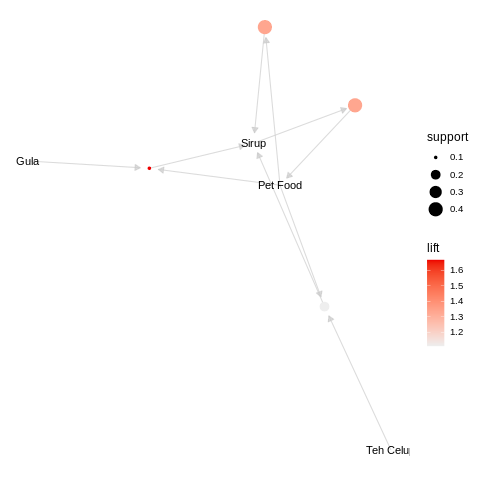

In [27]:
%%R
#Visualisasi Rules dengan Graph
library(arulesViz)
transaksi <- read.transactions(file="https://storage.googleapis.com/dqlab-dataset/data_transaksi.txt", format="single", sep="\t", cols=c(1,2), skip=1)
mba <- apriori(transaksi,parameter = list(supp = 0.1, confidence = 0.5))
plot(subset(mba, lift>1.1), method="graph")

Lingkaran disini adalah titik pertemuan (asosiasi) dari item-item yang ada, dimana terdapat tanda panah sebagai garis penghubungnya. Tiap Item disini berupa teks.

Besarnya bulatan menunjukkan popularitas, dan intensitas warna menunjukkan lift. Terlihat disini Gula ke Sirup, dan Pet Food ke Sirup memiliki lift yang relatif tinggi tapi supportnya tidak terlalu besar.

# STI

In [34]:
%%R
#Membaca transaksi dari file data_transaksi.txt
transaksi <- read.table("/content/drive/MyDrive/Market Basket Analysis/MarketBasketAnalysis_STI_2020-2021_Desc.csv",
               header = FALSE, sep=",")

#Menampilkan data transaksi dengan print dan inspect 
#inspect(transaksi)

#Menghasilkan model Market Basket Analysis
mba <- apriori(transaksi,parameter = list(supp = 0.1, confidence = 0.5))

#Menampilkan paket produk
inspect(subset(mba, lift>1))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1450 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[10608 item(s), 14503 transaction(s)] done [0.10s].
sorting and recoding items ... [6 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 done [0.01s].
writing ... [7 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].
    lhs           rhs      support   confidence coverage  lift     count
[1] {V3=TACO } => {V4=PDG} 0.1626560 0.9577751  0.1698269 1.359293 2359 
[2] {V3=MC }   => {V4=PKU} 0.1190099 0.5690735  0.2091291 1.926984 1726 
[3] {V3=MC }   => {V5=1}   0.1512101 0.7230465  0.2091291 1.469087 

In [35]:
%%R
data("Groceries")

In [ ]:
%%R
inspect(Groceries)

Streaming output truncated to the last 5000 lines.
        mustard,                  
        ready soups,              
        soda}                     
[8774] {citrus fruit,             
        tropical fruit,           
        whole milk,               
        curd,                     
        dessert,                  
        mayonnaise,               
        domestic eggs,            
        margarine,                
        sugar,                    
        pot plants}               
[8775] {beef}                     
[8776] {frankfurter,              
        chicken,                  
        citrus fruit,             
        root vegetables}          
[8777] {pork,                     
        other vegetables,         
        whole milk,               
        brown bread,              
        pastry,                   
        sugar}                    
[8778] {yogurt,                   
        rolls/buns,               
        dog food,                 
    

In [38]:
%%R
rules <- apriori(Groceries, parameter = list(supp = 0.01, conf = 0.2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.2    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 98 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [88 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.01s].
writing ... [232 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
